# Python
---

### t-test

In [1]:
import numpy as np

from scipy import stats

In [2]:
np.random.seed(100)

data1 = np.random.normal(loc = 0, scale = 1, size = 50)
data2 = np.random.normal(loc = 1, scale = 1, size = 50)

In [3]:
# 귀무가설 :: μ = 0
true_mu = 0

# one-sample t-test :: data1
onesample_results = stats.ttest_1samp(a = data1, popmean = true_mu)
onesample_results

Ttest_1sampResult(statistic=-0.3034412147662249, pvalue=0.7628383360909529)

In [4]:
print("statistics: %.2f" % onesample_results[0], "p-value: %.2f" % onesample_results[1])

statistics: -0.30 p-value: 0.76


In [5]:
# two-sample t-test :: 2개의 독립적인 샘플들에 대한 t-test
twosample_results = stats.ttest_ind(a = data1, b = data2, equal_var = True)
twosample_results

Ttest_indResult(statistic=-4.466832125445601, pvalue=2.129404268303471e-05)

In [6]:
print("statistics: %.2f" % twosample_results[0], "p-value: %.2f" % twosample_results[1])

statistics: -4.47 p-value: 0.00


### 상관분석

In [7]:
import numpy as np
from scipy import stats

In [8]:
corr_results = stats.pearsonr(x = data1, y = data2)
print("coeff: %.2f" % corr_results[0], "p-value: %.2f" % corr_results[1])

coeff: 0.01 p-value: 0.92


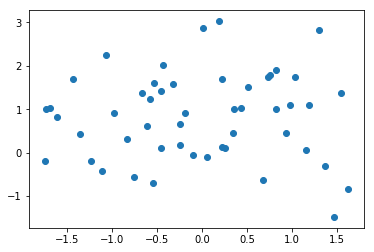

In [10]:
import matplotlib.pyplot as plt
plt.scatter(data1, data2)

### 선형회귀분석(Linear regression)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [14]:
# 데이터 로드
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [21]:
# 데이터 처리
diabetes_X = diabetes.data[:, np.newaxis, 2]
# diabetes_X = diabetes.data[:, 2] #1-dimesion array :: need to 2-dimesion array
diabetes_X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [23]:
# 설명변수
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]

# 종속변수
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [19]:
diabetes_y_test

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

In [26]:
# model fitting
regr = linear_model.LinearRegression()
regr.fit(X = diabetes_X_train, y = diabetes_y_train)
print(regr.intercept_)
print(regr.coef_)

152.91886182616167
[938.23786125]


In [27]:
regr.predict(diabetes_X_test)

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


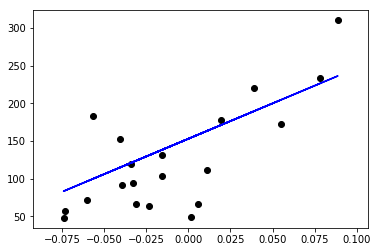

In [28]:
print("Coefficients: \n", regr.coef_)

print("Mean squared error: %.2f"%
     np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2))

print("Variance score: %.2f" % regr.score(diabetes_X_test, diabetes_y_test))

plt.scatter(x = diabetes_X_test, y = diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color = 'blue')
plt.show()

In [32]:
import statsmodels.api as sm

diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

X_train, X_test = X[:-20], X[-20:]
y_train, y_test = y[:-20], y[-20:]

X_train2 = sm.add_constant(X_train) # 상수 더하기
est = sm.OLS(endog = y_train, exog = X_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     211.7
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           3.98e-39
Time:                        14:12:05   Log-Likelihood:                -2346.5
No. Observations:                 422   AIC:                             4697.
Df Residuals:                     420   BIC:                             4705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.9189      3.069     49.830      0.0

### 로지스틱회귀분석(Logistic regression)

In [33]:
import numpy as np

In [34]:
X_train = np.array([[ 1,   20,   30,   1],
                    [ 2,   22,   12,  33],
                    [ 3,   45,   65,  77],
                    [12,   43,   55,  65],
                    [11,   25,   30,   1],
                    [22,   23,   19,  31],
                    [31,   41,   11,  70],
                    [ 1,   48,   23,  60]])

In [35]:
y_train = np.array([1, 2, 3, 4, 1, 2, 3, 4])

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.coef_

array([[-0.04755211,  0.04741726,  0.15715176, -0.26984255],
       [ 0.03720105, -0.11336463, -0.01885727,  0.03945809],
       [ 0.03039199, -0.86717539,  0.00288869,  0.53191649],
       [-0.1140542 ,  0.00443703, -0.03152381,  0.03328983]])

In [38]:
y_hat = lr.predict(X_train)
y_hat

array([1, 4, 3, 4, 1, 2, 3, 4])

### 군집분석(K-means Clustering)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
import sklearn

In [41]:
np.random.seed(5)

In [42]:
iris = datasets.load_iris()

In [6]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [43]:
x = iris.data
y = iris.target

In [44]:
estimators = {"k_means_iris_3" : KMeans(n_clusters = 3),
             "k_means_iris_8"  : KMeans(n_clusters = 8),
             "k_means_iris_bad_init" : KMeans(n_clusters = 3, n_init = 1, init = "random")}

In [48]:
estimators.items()

dict_items([('k_means_iris_3', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)), ('k_means_iris_8', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)), ('k_means_iris_bad_init', KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

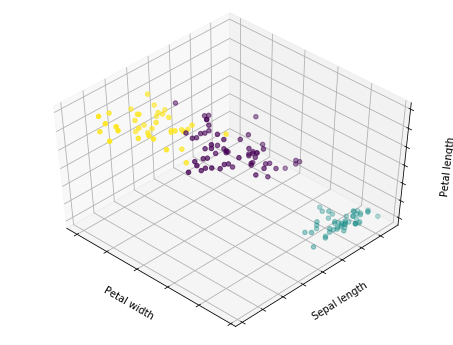

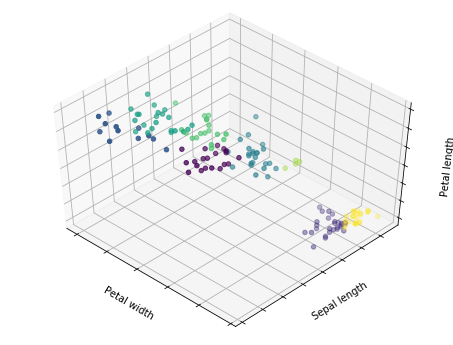

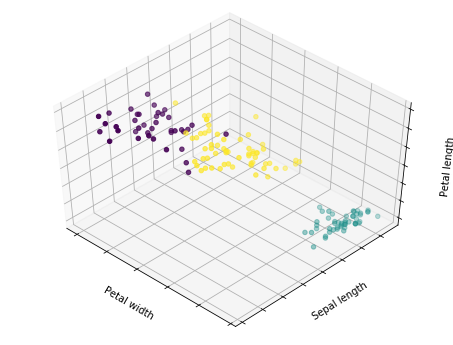

In [49]:
for name, est in estimators.items():
    # figsize가 (4,3)인 plot
    fig = plt.figure(figsize = (4, 3))
    
    # 축이 3D인 rect : [left, bottom, width, height] coordinates
    # elev : Elevation viewing angle (default 30)
    # azim : Azimuthal viewing angle (default -60)
    ax = Axes3D(fig, rect=[0, 0, 1.5, 1.5], elev = 48, azim = 134)
    
    est.fit(x) # estimatore의 아이템(KMeans().fit(x))
    labels = est.labels_ # est.labels_ k means 군집 결과
    
    #  x[:, 0] :: sepal length
    #  x[:, 1] :: sepal width
    #  x[:, 2] :: petal length
    #  x[:, 3] :: petal width
    
    # x 축에는 petal width 걊을
    # y 축에는 sepal length 값을
    # z 축에는 petal length 값을 그려라
    # point의 color는 labels들을 float값으로 변경하여 넣어라(labels : 군집결과)
    ax.scatter(x[:, 3], x[:, 0], x[:, 2], c = labels.astype(np.float))
    
    # 축의 값을 제거 ([]), 축의 이름을 설정
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.show()

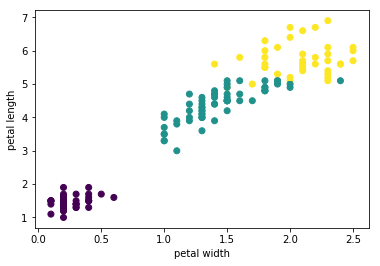

In [50]:
plt.scatter(x = iris.data[:, 3], y = iris.data[:, 2], c = KMeans(n_clusters = 3).fit(x).labels_.astype(np.float))
plt.xlabel("petal width")
plt.ylabel("petal length")
plt.show()

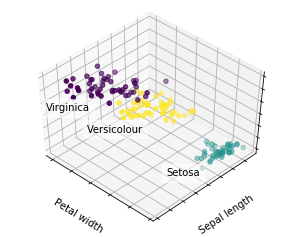

In [51]:
fig = plt.figure(figsize = (4,3))
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 134)

for name, label in [("Setosa", 0), ("Versicolour", 1),("Virginica", 2)]:
    ax.text3D(x[y == label, 3].mean(),
              x[y == label, 0].mean() + 1.5,
              x[y == label, 2].mean(), 
             name,
             horizontalalignment = "center",
             bbox = dict(alpha = .5, edgecolor = "w", facecolor = "w"))
temp_y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c = temp_y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

### Neural network

In [2]:
import tensorflow
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
np.random.seed(7)

In [5]:
dataset = np.loadtxt("../1. data/pima-indians-diabets.txt", delimiter = ",")
X = dataset[:, 0:8] # input data
Y = dataset[:, 8] # output data

In [6]:
dataset.shape

(768, 9)

In [8]:
# 표준화
for i in range(8):
    X[:, i] = X[:, i] - avg(X[:, i]) / (max(X[:, i]) - min(X[:, i]))

NameError: name 'avg' is not defined

In [61]:
# NN model 디자인
NN_model = Sequential()
NN_model.add(Dense(12, input_dim = 8, init = "uniform", activation = "relu"))
NN_model.add(Dense(10, init = "uniform", activation = "relu"))
NN_model.add(Dense(1, init = "uniform", activation = "sigmoid"))
NN_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# NN model fitting
history = NN_model.fit(X, Y , validation_split = 0.33, nb_epoch = 300, batch_size = 10)
scores = NN_model.evaluate(X, Y)

print("%s: %.2f%%"%(NN_model.metrics_names[1], scores[1]*100))

NN_model.save("my_model.h5")
NN_model = load_model("my_model.h5")
NN_model.get_weights()
NN_model.save_weights("my_weight.h5")

C:\Users\jhpark-homepc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\jhpark-homepc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  
C:\Users\jhpark-homepc\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\jhpark-homepc\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 514 samples, validate on 254 samples
Epoch 1/300
514/514 [==============================] - 0s 638us/step - loss: 0.6896 - acc: 0.6401 - val_loss: 0.6828 - val_acc: 0.6732
Epoch 2/300
514/514 [==============================] - 0s 123us/step - loss: 0.6793 - acc: 0.6401 - val_loss: 0.6668 - val_acc: 0.6732
Epoch 3/300
514/514 [==============================] - 0s 125us/step - loss: 0.6673 - acc: 0.6401 - val_loss: 0.6513 - val_acc: 0.6732
Epoch 4/300
514/514 [==============================] - 0s 95us/step - loss: 0.6611 - acc: 0.6401 - val_loss: 0.6445 - val_acc: 0.6732
Epoch 5/300
514/514 [==============================] - 0s 102us/step - loss: 0.6596 - acc: 0.6401 - val_loss: 0.6428 - val_acc: 0.6732
Epoch 6/300
514/514 [==============================] - 0s 120us/step - loss: 0.6568 - acc: 0.6401 - val_loss: 0.6403 - val_acc: 0.6732
Epoch 7/300
514/514 [==============================] - 0s 103us/step - loss: 0.6551 - acc: 0.6401 - val_loss: 0.6387 - val_acc: 0.6732
Epoch 8/30

514/514 [==============================] - 0s 93us/step - loss: 0.4996 - acc: 0.7724 - val_loss: 0.4305 - val_acc: 0.7992
Epoch 62/300
514/514 [==============================] - 0s 114us/step - loss: 0.4982 - acc: 0.7685 - val_loss: 0.4296 - val_acc: 0.8110
Epoch 63/300
514/514 [==============================] - 0s 122us/step - loss: 0.4997 - acc: 0.7529 - val_loss: 0.4285 - val_acc: 0.8071
Epoch 64/300
514/514 [==============================] - 0s 88us/step - loss: 0.4993 - acc: 0.7665 - val_loss: 0.4289 - val_acc: 0.8031
Epoch 65/300
514/514 [==============================] - 0s 113us/step - loss: 0.4972 - acc: 0.7607 - val_loss: 0.4283 - val_acc: 0.8071
Epoch 66/300
514/514 [==============================] - 0s 131us/step - loss: 0.5027 - acc: 0.7626 - val_loss: 0.4280 - val_acc: 0.8110
Epoch 67/300
514/514 [==============================] - 0s 93us/step - loss: 0.4991 - acc: 0.7646 - val_loss: 0.4291 - val_acc: 0.7992
Epoch 68/300
514/514 [==============================] - 0s 97us/

514/514 [==============================] - 0s 157us/step - loss: 0.4913 - acc: 0.7685 - val_loss: 0.4269 - val_acc: 0.8071
Epoch 182/300
514/514 [==============================] - 0s 140us/step - loss: 0.4935 - acc: 0.7665 - val_loss: 0.4291 - val_acc: 0.8150
Epoch 183/300
514/514 [==============================] - 0s 125us/step - loss: 0.4944 - acc: 0.7607 - val_loss: 0.4268 - val_acc: 0.8071
Epoch 184/300
514/514 [==============================] - 0s 139us/step - loss: 0.4924 - acc: 0.7646 - val_loss: 0.4258 - val_acc: 0.8031
Epoch 185/300
514/514 [==============================] - 0s 110us/step - loss: 0.4922 - acc: 0.7646 - val_loss: 0.4246 - val_acc: 0.7992
Epoch 186/300
514/514 [==============================] - 0s 127us/step - loss: 0.4906 - acc: 0.7704 - val_loss: 0.4387 - val_acc: 0.8110
Epoch 187/300
514/514 [==============================] - 0s 133us/step - loss: 0.4933 - acc: 0.7763 - val_loss: 0.4249 - val_acc: 0.8031
Epoch 188/300
514/514 [==============================] 

514/514 [==============================] - 0s 125us/step - loss: 0.4904 - acc: 0.7665 - val_loss: 0.4255 - val_acc: 0.7953
Epoch 242/300
514/514 [==============================] - 0s 105us/step - loss: 0.4901 - acc: 0.7646 - val_loss: 0.4247 - val_acc: 0.8071
Epoch 243/300
514/514 [==============================] - 0s 94us/step - loss: 0.4877 - acc: 0.7704 - val_loss: 0.4249 - val_acc: 0.7953
Epoch 244/300
514/514 [==============================] - 0s 123us/step - loss: 0.4896 - acc: 0.7626 - val_loss: 0.4235 - val_acc: 0.7992
Epoch 245/300
514/514 [==============================] - 0s 133us/step - loss: 0.4892 - acc: 0.7685 - val_loss: 0.4240 - val_acc: 0.7992
Epoch 246/300
514/514 [==============================] - 0s 110us/step - loss: 0.4884 - acc: 0.7665 - val_loss: 0.4245 - val_acc: 0.7992
Epoch 247/300
514/514 [==============================] - 0s 97us/step - loss: 0.4874 - acc: 0.7685 - val_loss: 0.4262 - val_acc: 0.7992
Epoch 248/300
514/514 [==============================] - 

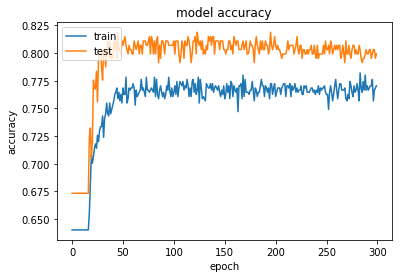

In [62]:
# 반복 (epoch)에 따른 정확도의 변화
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

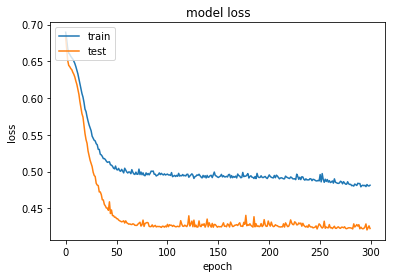

In [63]:
# 반복 (epoch)에 따른 loss의 변화
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc = "upper left")
plt.show()